# IST 707 Checkpoint 2: The A+ Team

## Predicting Playoff Potential: Key Factors Behind NBA Playoff Teams

We will start by uploading our data which contains per game variables, opponent per game variables, and advanced statistics.

In [2]:
import pandas as pd

#Importing our data
nba = pd.read_csv("/workspaces/student-group-project-the-a-team/checkpoint2/IST707_NBA_Data.csv")
nba.head()

,Rk_x,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G,Playoff
0,1,San Antonio Spurs,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,...,31.8,0.262,0.506,14.4,66.8,0.216,HemisFair Arena,NaN,998.0,1
1,2,Los Angeles Lakers,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,...,32.6,0.220,0.475,14.0,66.9,0.181,The Forum,582882.0,427.0,1
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,...,33.1,0.212,0.505,16.3,65.9,0.216,Coliseum at Richfield,NaN,1189.0,0
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,...,33.7,0.221,0.498,16.4,64.0,0.263,Madison Square Garden (IV),NaN,1432.0,0
4,5,Boston Celtics,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,...,34.8,0.258,0.475,16.5,67.8,0.234,Boston Garden,596349.0,14490.0,1


In [5]:
nba.shape

(1254, 78)

As we can see from the shape of our data frame, we have 1254 rows and 78 columns.

In [6]:
nba.dtypes

Rk_x           int64
Team          object
G              int64
MP           float64
FG           float64
              ...   
FT/FGA.1     float64
Arena         object
Attend.      float64
Attend./G    float64
Playoff        int64
Length: 78, dtype: object

We are going to use the janitor package to clean our column names.

In [12]:
!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00


In [14]:
import janitor

#Cleaning data frame
nba = pd.DataFrame(nba) 
nba = nba.clean_names()

print(nba.columns)

Index(['rk_x', 'team', 'g', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p',
       '2pa', '2p%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'year', 'opponent_rk', 'opponent_g',
       'opponent_mp', 'opponent_fg', 'opponent_fga', 'opponent_fg%',
       'opponent_3p', 'opponent_3pa', 'opponent_3p%', 'opponent_2p',
       'opponent_2pa', 'opponent_2p%', 'opponent_ft', 'opponent_fta',
       'opponent_ft%', 'opponent_orb', 'opponent_drb', 'opponent_trb',
       'opponent_ast', 'opponent_stl', 'opponent_blk', 'opponent_tov',
       'opponent_pf', 'opponent_pts', 'rk_y', 'age', 'w', 'l', 'pw', 'pl',
       'mov', 'sos', 'srs', 'ortg', 'drtg', 'nrtg', 'pace', 'ftr', '3par',
       'ts%', 'efg%', 'tov%', 'orb%', 'ft_fga', 'efg%_1', 'tov%_1', 'drb%',
       'ft_fga_1', 'arena', 'attend_', 'attend_g', 'playoff'],
      dtype='object')


After cleaning our data frame column names, we can see our new data frame column names.

## Exploratory Analysis

### We will begin by exploring our per game variables and looking at the distributions of them.

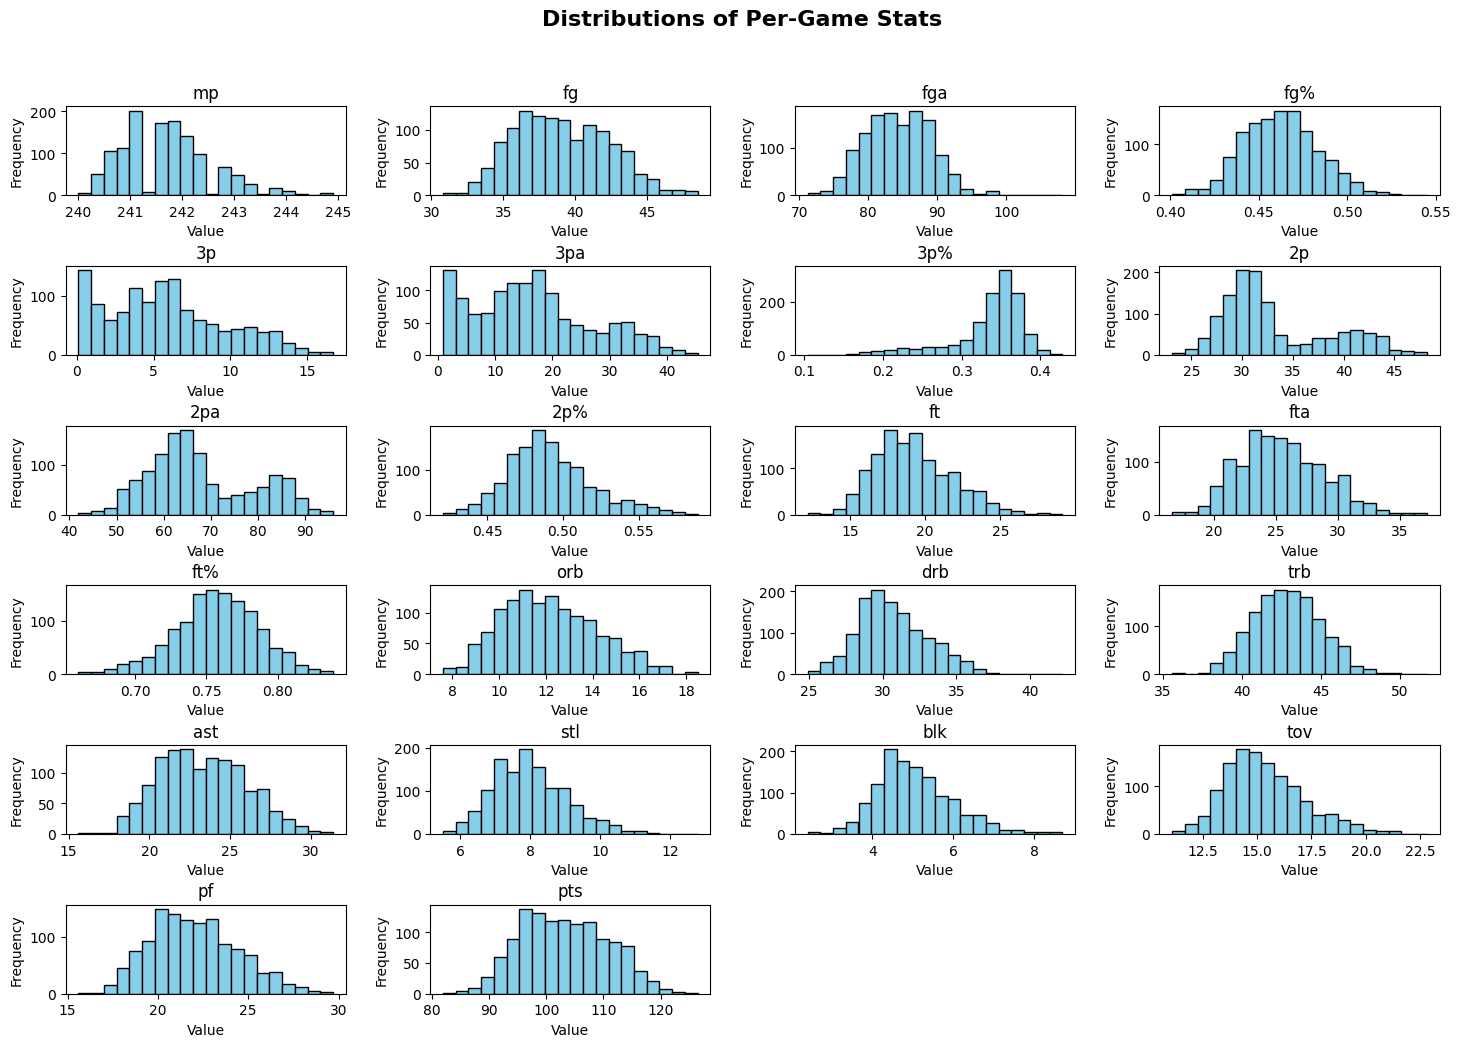

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Selecting per game stats
per_game_stats = nba.loc[:, 'mp':'pts']

#Setting columns and rows for the subplots
num_vars = per_game_stats.shape[1]
num_cols = 4 
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

#Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

#Main Title
fig.suptitle("Distributions of Per-Game Stats", fontsize=16, fontweight='bold', y=1.05)

#Flattening
axes = axes.flatten()

#Plotting histograms
for i, column in enumerate(per_game_stats.columns):
    axes[i].hist(per_game_stats[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

We can see from our distributions that we have a lot of variables that take on symmetric distributions, or closely symmetric with long tails. 

The main variables that do not have symmetric or closely symmetric distributions are our field goal and 3-point field goals. This makes a lot of sense as we have seen a shift in how the game is played as recently, 3-pointers have become more frequently taken and 2-pointers have become obsolete, especially mid-range 2-pointers.

### We will now look at the distributions of our opponent per-game stats. These variables will be a good look at how each team is performing defensively.

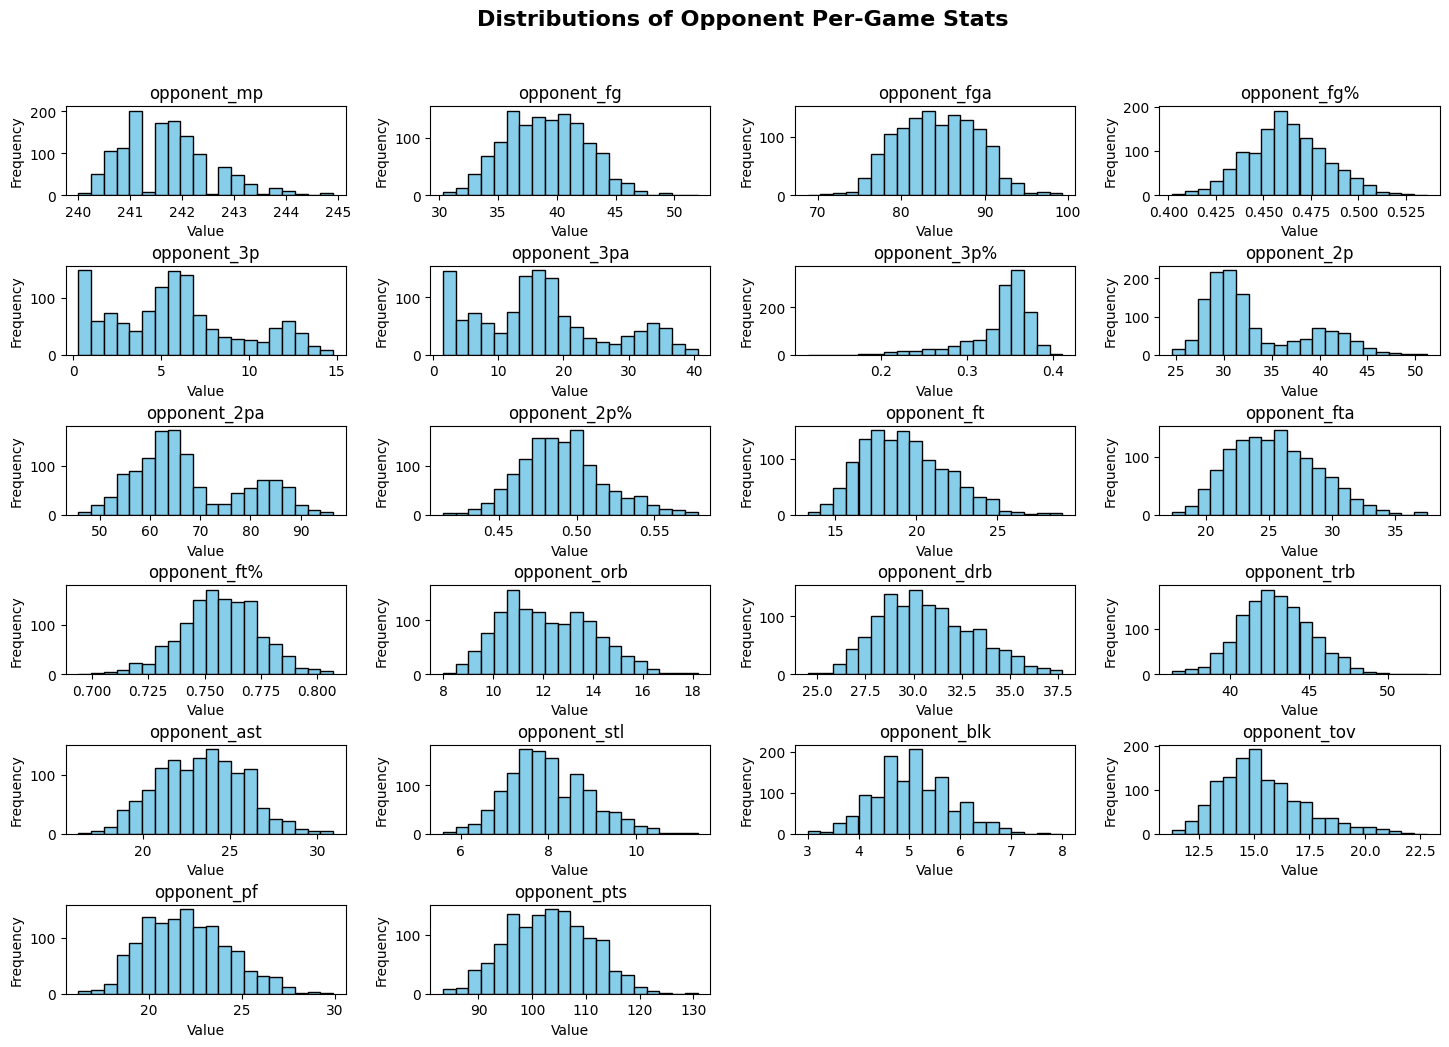

In [20]:
#Selecting per game stats
opponent_per_game_stats = nba.loc[:, 'opponent_mp':'opponent_pts']

#Setting columns and rows for the subplots
num_vars = opponent_per_game_stats.shape[1]
num_cols = 4 
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

#Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

#Main Title
fig.suptitle("Distributions of Opponent Per-Game Stats", fontsize=16, fontweight='bold', y=1.05)

#Flattening
axes = axes.flatten()

#Plotting histograms
for i, column in enumerate(opponent_per_game_stats.columns):
    axes[i].hist(opponent_per_game_stats[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

We see the exact same results for our opponent per-game statistics. This makes sense as these statistics would just be the same as the per-game stats, except the opposite for each team (Each team's per-game stats would be shown in every other team's opponent per-game stats).

### Finally we will look at the distributions of our advanced statistics.

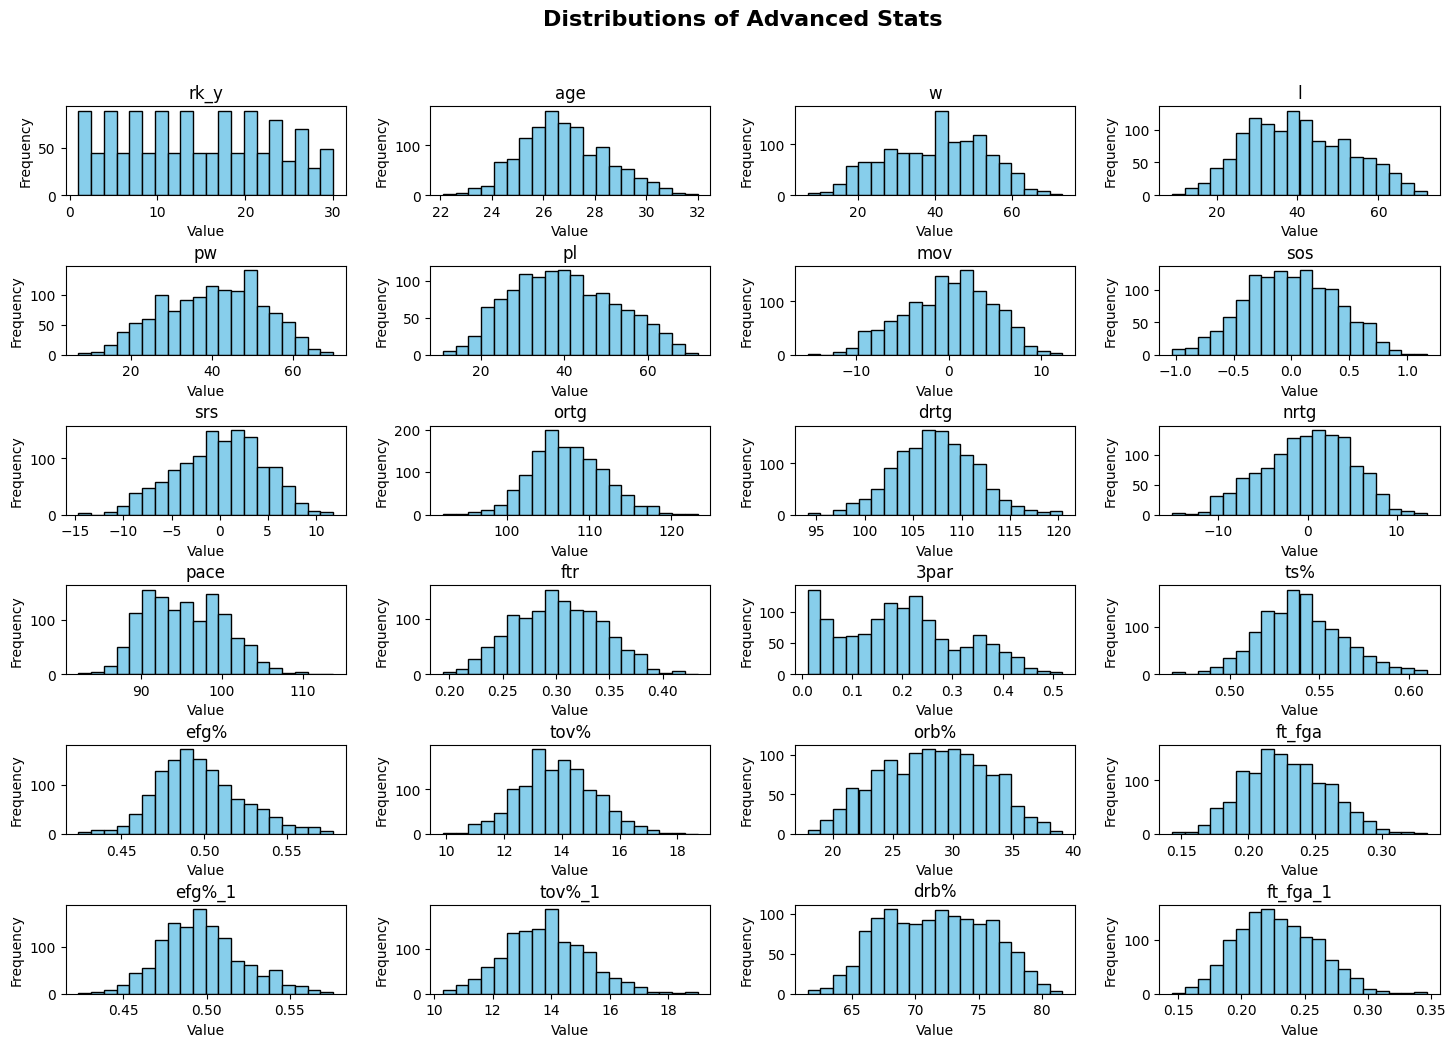

In [21]:
#Selecting per game stats
advanced_stats = nba.loc[:, 'rk_y':'ft_fga_1']

#Setting columns and rows for the subplots
num_vars = advanced_stats.shape[1]
num_cols = 4 
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

#Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

#Main Title
fig.suptitle("Distributions of Advanced Stats", fontsize=16, fontweight='bold', y=1.05)

#Flattening
axes = axes.flatten()

#Plotting histograms
for i, column in enumerate(advanced_stats.columns):
    axes[i].hist(advanced_stats[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Here we see many of our variables take on symmetric curves. This could show that a lot of our advanced statistics could be useful in determine playoff contenders as there will be a mix of teams centered in the average of these statistics and the good and bad teams will be outside of the centers (most-likely) showing which statistics will be bigger determinants of making the playoffs.

### Distirbution of Making the Playoffs (Our Dependendent Variable)

/tmp/ipykernel_5997/4030139072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playoff_counts.index, y=playoff_counts.values, palette='viridis')


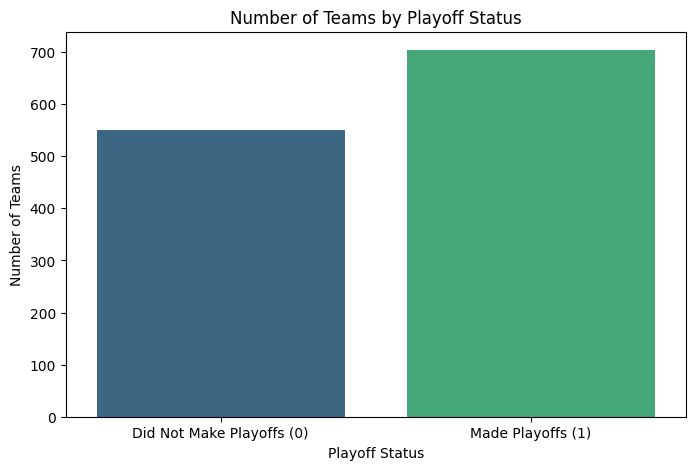

In [ ]:
#Counts of our playoff variable
playoff_counts = nba['playoff'].value_counts()

#Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=playoff_counts.index, y=playoff_counts.values, palette='viridis')
plt.xticks([0, 1], ['Did Not Make Playoffs (0)', 'Made Playoffs (1)'])
plt.xlabel('Playoff Status')
plt.ylabel('Number of Teams')
plt.title('Number of Teams by Playoff Status')
plt.show()

We see that we have more teams that made the playoffs then that did not make the playoffs, which makes sense since there are 30 NBA teams and 16 teams make the playoffs every year.

## Cleaning our Data Frame

In [24]:
#Columns to drop
columns_to_drop = ['rk_x', 'g', 'opponent_rk', 'opponent_g', 'rk_y', 'arena', 'attend_']

#Dropping columns
nba.drop(columns=columns_to_drop, inplace=True)

We decided to drop a few columns that do not add any help to our analysis. We drop the rank variables as these are just the ranking of teams based on points and opponent points, games as every team plays the same amount of teams, arena since the certain arena is not what we are looking at, and attendance since we have attendance per-game statistics.

### Checking for N/As

In [ ]:
#Getting counts of N/As in each column
na_counts = nba.isna().sum()

#Getting only columns with N/As
na_counts_filtered = na_counts[na_counts > 0]

print(na_counts_filtered)

attend_g    11
dtype: int64


We see that the only column we see N/As present in is our attendance per-game column. We will manually input the data for these.

In [ ]:
#Getting the rows where there are N/As for attendance
na_attend_g_rows = nba[nba['attend_g'].isna()][['team', 'year']]

print(na_attend_g_rows)

                       team  year
11      Seattle SuperSonics  1980
14        Kansas City Kings  1980
41      Seattle SuperSonics  1981
56      Seattle SuperSonics  1982
77      Seattle SuperSonics  1983
105     Seattle SuperSonics  1984
136     Seattle SuperSonics  1985
1140         Indiana Pacers  2021
1145       Sacramento Kings  2021
1158             Miami Heat  2021
1161  Oklahoma City Thunder  2021


In [ ]:
#Getting attendance numbers manually for each
attendance_data = {
    ('Seattle SuperSonics', 1980): 21725,
    ('Kansas City Kings', 1980): 9156,
    ('Seattle SuperSonics', 1981): 16466,
    ('Seattle SuperSonics', 1982): 18294,
    ('Seattle SuperSonics', 1983): 14024,
    ('Seattle SuperSonics', 1984): 10902,
    ('Seattle SuperSonics', 1985): 7399,
    ('Indiana Pacers', 2021): 0,
    ('Sacramento Kings', 2021): 0,
    ('Miami Heat', 2021): 0,
    ('Oklahoma City Thunder', 2021): 0
}

#Updating attend_g for these columns
for (team, year), attendance in attendance_data.items():
    nba.loc[(nba['team'] == team) & (nba['year'] == year), 'attend_g'] = attendance


Empty DataFrame
Columns: [team, mp, fg, fga, fg%, 3p, 3pa, 3p%, 2p, 2pa, 2p%, ft, fta, ft%, orb, drb, trb, ast, stl, blk, tov, pf, pts, year, opponent_mp, opponent_fg, opponent_fga, opponent_fg%, opponent_3p, opponent_3pa, opponent_3p%, opponent_2p, opponent_2pa, opponent_2p%, opponent_ft, opponent_fta, opponent_ft%, opponent_orb, opponent_drb, opponent_trb, opponent_ast, opponent_stl, opponent_blk, opponent_tov, opponent_pf, opponent_pts, age, w, l, pw, pl, mov, sos, srs, ortg, drtg, nrtg, pace, ftr, 3par, ts%, efg%, tov%, orb%, ft_fga, efg%_1, tov%_1, drb%, ft_fga_1, attend_g, playoff]
Index: []

[0 rows x 71 columns]


We went in and manually updated the attendance for each of the rows where it was missing.
As we can see for the 2020-2021 season, we had some teams who had no attendance. This is due to it being the "COVID Season" where some teams did not allow fans. We may not include this season eventually as there were less games that season as well as some teams not allowing fans.

## Initial Modeling

### We will start with a linear regression on all of our variables

In [ ]:
#Removing the team column to only have numeric variables
numeric_columns = nba.select_dtypes(include=['float64', 'int64'])

      mp    fg   fga    fg%   3p  3pa    3p%    2p   2pa    2p%    ft   fta  \
0  240.9  47.0  94.4  0.498  0.6  2.5  0.252  46.4  91.9  0.505  24.7  30.8   
1  242.4  47.5  89.9  0.529  0.2  1.2  0.200  47.3  88.6  0.534  19.8  25.5   
2  243.0  46.5  98.1  0.474  0.4  2.3  0.193  46.0  95.8  0.481  20.8  26.9   
3  241.2  46.4  93.6  0.496  0.5  2.3  0.220  45.9  91.2  0.503  20.7  27.7   
4  242.4  44.1  90.1  0.490  2.0  5.1  0.384  42.1  84.9  0.496  23.3  29.9   

     ft%   orb   drb   trb   ast   stl  blk   tov    pf    pts  year  \
0  0.801  14.1  30.7  44.7  28.4   9.4  4.1  19.4  25.6  119.4  1980   
1  0.775  13.2  32.4  45.6  29.4   9.4  6.7  20.0  21.8  115.1  1980   
2  0.772  15.9  29.0  45.0  25.7   9.3  4.2  16.7  23.6  114.1  1980   
3  0.747  15.1  28.1  43.2  27.6  10.7  5.6  19.7  26.4  114.0  1980   
4  0.779  15.0  30.0  44.9  26.8   9.9  3.8  18.8  24.1  113.5  1980   

   opponent_mp  opponent_fg  opponent_fga  opponent_fg%  opponent_3p  \
0        240.9      

In [44]:
from sklearn.model_selection import train_test_split

#Getting X and y for splitting
X = numeric_columns.drop(columns=['playoff'])  #Independent variables
y = numeric_columns['playoff']                 #Dependent variable

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
!pip install statsmodels

/home/codespace/.python/current/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=5997) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 57.3 MB/s eta 0:00:00


In [48]:
import statsmodels.api as sm

#Adding constant
X_train_with_const = sm.add_constant(X_train)

#Linear regression
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                playoff   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     28.92
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.12e-181
Time:                        03:01:50   Log-Likelihood:                -160.79
No. Observations:                1003   AIC:                             455.6
Df Residuals:                     936   BIC:                             784.6
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.8155     25.435     -0.229   

We can see from our inital linear regression model that we see a strong Adjusted R^2 score of .648 meaning that about 65% of the variance in a team making the playoffs or not is captured in our model. However, with all of the variables here, we believe that we can limit these and achieve better scores.

We'll start by changing our model to a logistic regression to capture the binary target variable.

### Checking VIF Scores

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature           VIF
0             mp           inf
1             fg  1.542796e+06
2            fga  3.624621e+06
3            fg%  1.473199e+06
4             3p  4.139213e+04
5            3pa  1.712791e+05
6            3p%  2.688529e+02
7             2p  5.813069e+05
8            2pa  2.035545e+06
9            2p%  3.233571e+04
10            ft  1.841107e+05
11           fta  1.731260e+05
12           ft%  5.071989e+04
13           orb  8.359338e+04
14           drb  5.080275e+05
15           trb  9.378503e+05
16           ast  3.688718e+02
17           stl  4.190659e+02
18           blk  5.826033e+01
19           tov  4.606180e+04
20            pf  1.816420e+03
21           pts  8.155781e+06
22          year  7.536497e+05
23   opponent_mp           inf
24   opponent_fg  1.605256e+06
25  opponent_fga  3.961406e+06
26  opponent_fg%  7.934681e+05
27   opponent_3p  3.942813e+04
28  opponent_3pa  1.893404e+05
29  opponent_3p%  4.628929e+02
30   opponent_2p  5.143985e+05
31  oppo

We see a lot of very highly correlated variables according to our VIF scores which we will remove some variables eventually to fix this.

### Logistic Regression

In [46]:
#Logistic Regression
logit_model = sm.Logit(y_train, X_train_with_const)
logit_results = logit_model.fit()

print(logit_results.summary())

         Current function value: 0.122294
         Iterations: 35


LinAlgError: Singular matrix

We cannot do logisitc regression until we remove some the VIF scores which are extremely high which i will do tomorrow.